In [50]:
# Load kedro environment (not needed in .py)
from pathlib import Path
from kedro.framework.context import load_context

# Load a context to be able to work in the notebook
#current_dir = Path.cwd()
current_dir = Path("/u01/share/cesar/actuals_repos/aa_engine_uy/notebooks_uy/")
proj_path = current_dir.parent
context = load_context(proj_path)
catalog = context.catalog
credentials = context.config_loader.get("credentials*","credentials*/**")
parameters = context.config_loader.get("parameters*","parameters*/**")
from aa_engine_pkg.assets.utils import *
from aa_engine_pkg.assets.core.data.kedro.catalog_expansion.partitioned_sql import SQLPartitionedDataSet
from aa_engine_pkg.pipelines.data_engineering.targets.nodes.master_target_retention import create_target_retention

In [51]:
date='20210614'

In [52]:
intencion_baja=catalog.load('intencion_baja')
churn=catalog.load("churn")
cliente_activo=catalog.load("cliente_activo")

2021-06-14 12:30:47,542 - kedro.io.data_catalog - INFO - Loading data from `intencion_baja` (SQLPartitionedDataSet)...
2021-06-14 12:30:47,544 - kedro.io.data_catalog - INFO - Loading data from `churn` (SQLPartitionedDataSet)...
2021-06-14 12:30:47,545 - kedro.io.data_catalog - INFO - Loading data from `cliente_activo` (SQLPartitionedDataSet)...


In [53]:
def create_cliente_activo(cliente_activo: SQLPartitionedDataSet,
                          date: str) -> pd.DataFrame:
    """Creates master table with features related to EoP state of customers for one period of data

    Parameters
    ----------
    cliente_activo:
        dataset defined in ´catalog.yml´ - list of active customers at EoP for the given period
    date:
        period to process
    
    Returns
    -------
        Mastertable with information of clientes at EoP
    """

    # Initialize logger
    log = initialize_logger()

    # Load active clientes for period
    log.info(f"Creating cliente_activo...")
    period_to_load = get_previous_month(date)
    df_clientes_activos = cliente_activo.filter_by(date=period_to_load)

    # Return
    return df_clientes_activos

In [59]:
period_to_load = get_previous_month(date)
past_date =(pd.to_datetime(date) - timedelta(days=28)).strftime("%Y%m%d")
print(past_date)

20210517


In [49]:
parameters["targets"]["target_xsell"][
                "activation_window"] = 0  # Sales in the past month, without 3M continuity
df_clientes_activos = cliente_activo.filter_by(date=period_to_load)
df_target = create_target_retention(intencion_baja=intencion_baja,
                                    churn=churn,
                                    cliente_activo=df_clientes_activos,
                                    date=past_date,  # starting 28 days ago
                                    parameters=parameters)

#df_target = df_target.groupby(["DATE_CALC", "CUSTOMER_ID"])["TARGET"].max().reset_index()

select distinct CUSTOMER_ID from stg_uy_eop_customer where PRC_TIPO_ID = 3 and DATE_EXP = 202105
2021-06-14 12:29:38,860 - aa_engine_pkg.assets.utils.utilities - INFO - Cannot create upsell target for 20210517: Not enough future information


In [26]:
df_target.groupby(["DATE_CALC", "CUSTOMER_ID"])["TARGET"].max().reset_index()

AttributeError: 'NoneType' object has no attribute 'groupby'

In [61]:
table_name = "target_retention"
write_to_parquet = parameters["write_to_parquet"]
overwrite = parameters["targets"][table_name]["overwrite"]
start_date = past_date
end_date = str(parameters["end_date"])

# Check if target can be created (date + max window < end_date)

target_parameters = parameters["targets"][table_name]
max_window = max([target_parameters[x] for x in target_parameters.keys() if x.endswith("window")])
upper_bound = (pd.to_datetime(past_date) + timedelta(days=max_window)).strftime("%Y%m%d")
#previous_sunday = dt.today() - timedelta(days=dt.today().weekday()+1)
date_today = dt.today()


In [62]:
max_window

28

In [64]:
print(date_today > upper_bound)

TypeError: '>' not supported between instances of 'datetime.date' and 'str'

2021-06-14 12:12:10,696 - aa_engine_pkg.assets.utils.utilities - INFO - [SCORE_MODEL] Scoring retention for 20200928...
2021-06-14 12:12:10,698 - aa_engine_pkg.assets.utils.utilities - INFO - Loading 20200928
['CAM_OFERTA_COMBINADA_UPGR_BASICO_nansum_14', 'CAM_OFERTA_COMBINADA_RENT_OTROS_nansum_21', 'CAM_OFERTA_COMBINADA_UPGR_BASICO_nansum_252', 'EVE_CAT_COMBINED_123_1_nansum_21', 'EVE_CAT_COMBINED_123_1_nansum_252', 'EVE_CAT_COMBINED_123_1_nansum_168', 'CAM_OFERTA_COMBINADA_RENT_OTROS_nansum_14', 'EVE_CAT_COMBINED_100133_1_nansum_21', 'CAM_OFERTA_COMBINADA_UPGR_BASICO_nansum_336', 'CAM_OFERTA_COMBINADA_UPGR_BASICO_nansum_168', 'EVE_CAT_COMBINED_123_1_nansum_336', 'EVE_CAT_COMBINED_100133_1_nansum_252', 'EVE_CAT_COMBINED_100133_1_nansum_14', 'EVE_CAT_COMBINED_100133_1_nansum_84', 'CAM_OFERTA_COMBINADA_UPGR_BASICO_nansum_21', 'CAM_OFERTA_COMBINADA_RENT_OTROS_nansum_168', 'EVE_CAT_COMBINED_100133_1_nansum_28', 'MAN_ESTADOWO_ID_AG_nansum_14', 'EVE_CAT_COMBINED_123_1_nansum_84', 'MAN_ESTAD

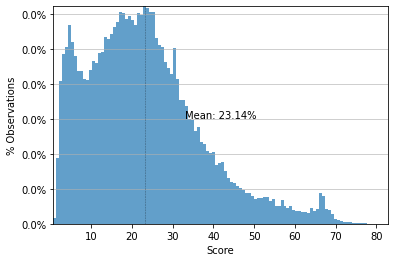

2021-06-14 12:12:15,008 - aa_engine_pkg.assets.utils.utilities - INFO - Comparing score against previous one...


/u01/miniconda3/envs/copo37/lib/python3.7/site-packages/numpy/lib/histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/u01/miniconda3/envs/copo37/lib/python3.7/site-packages/numpy/lib/histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
/u01/miniconda3/envs/copo37/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/u01/miniconda3/envs/copo37/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


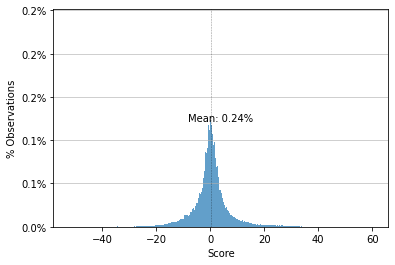

2021-06-14 12:12:16,780 - aa_engine_pkg.assets.utils.utilities - INFO - Calculating performance within past 28 days...
select distinct CUSTOMER_ID from stg_uy_eop_customer where PRC_TIPO_ID = 3 and DATE_EXP = 202008


/u01/miniconda3/envs/copo37/lib/python3.7/site-packages/sqlalchemy/dialects/oracle/base.py:1381: SAWarning: Oracle version (19, 5, 0, 0, 0) is known to have a maximum identifier length of 128, rather than the historical default of 30. SQLAlchemy 1.4 will use 128 for this database; please set max_identifier_length=128 in create_engine() in order to test the application with this new length, or set to 30 in order to assure that 30 continues to be used.  In particular, pay close attention to the behavior of database migrations as dynamically generated names may change. See the section 'Max Identifier Lengths' in the SQLAlchemy Oracle dialect documentation for background.
  % ((self.server_version_info,))


select * from stg_uy_intencion_baja where FECHA > to_date('20200831235900', 'yyyymmddhh24miss') and FECHA <= to_date('20200928235900', 'yyyymmddhh24miss')
select CUSTOMER_ID, trunc(FECHA) FECHA from stg_uy_plan_evento where PROD_CATEGORY_ID = 3 and EVENTO_ID in (100142,142) and FECHA > to_date('20200831235900', 'yyyymmddhh24miss') and FECHA <= to_date('20200928235900', 'yyyymmddhh24miss')
(8115, 4)
2021-06-14 12:12:23,847 - aa_engine_pkg.assets.utils.utilities - INFO - Exporting target for period 20200831 and rate 20.57%
2021-06-14 12:12:23,855 - aa_engine_pkg.assets.utils.utilities - INFO - Loading score to check performance...
2021-06-14 12:12:23,971 - aa_engine_pkg.assets.utils.utilities - INFO - Calculating uplift...
2021-06-14 12:12:24,000 - aa_engine_pkg.assets.utils.utilities - INFO - Calculating AUC...
2021-06-14 12:12:24,104 - aa_engine_pkg.assets.utils.utilities - INFO - Real AUC for past 28 days is: 0.73


True

In [18]:
retention_score(True,intencion_baja=intencion_baja,churn=churn,
                    cliente_activo=cliente_activo,
                    parameters = parameters)

In [17]:
def retention_score(start,
                    intencion_baja: SQLPartitionedDataSet,
                    churn: SQLPartitionedDataSet,
                    cliente_activo: SQLPartitionedDataSet,
                    parameters: Union[Dict, None]):
    """Wrapper of score function for retention model
    Parameters
    ----------
    start:
        flag that starts scoring process after mastertable is ready
    intencion_baja:
        dataset defined in ``catalog_raw.yml`` with raw data information related to customers calling to cancel the
        service
    churn:
        dataset defined in ``catalog_raw.yml`` with raw data information related to customers requesting cancellation of
        the programming service
    cliente_activo:
        dataset defined in ``catalog_raw.yml`` with raw data information related to active clients at EoP
    parameters:
        set of project parameters defined in ``parameters.yml``

    Returns
    -------
        None
    """
    if start:
        score(parameters=parameters,
              model="retention",
              model_type="binary",
              intencion_baja=intencion_baja,
              churn=churn,
              cliente_activo=cliente_activo)
        
    return True

In [14]:
from aa_engine_pkg.pipelines.data_engineering.targets.nodes.master_target_retention import create_target_retention

def score(parameters: Union[Dict, None],
          model: str,
          model_type="",
          activaciones_premium=None,
          reconexiones_basicos=None,
          cancelaciones_premium=None,
          plan_evento=None,
          intencion_baja=None,
          churn=None,
          intencion_baja_net=None,
          churn_net=None,
          eop_net=None,
          eop=None,
          upgrades_basicos=None,
          cliente_activo=None,
          agenda_baja = None,
          borrado_agenda = None,
          cliente_no_activo = None):
    """Function to takes care of scoring the customer base, including:
        1. Data quality check of the top 20% features of the model, checking mean value and NaN percentage
        2. Post-scoring distribution analysis: histogram of the distribution of scores
        3. Post-scoring residual score distribution analysis: histogram of the difference of scores between current and
    previous score
        4. 28-day-back performance analysis: calculates real AUC and lift for the model using score of 28 days back in
    history
    All analysis outputs are stored in ``/data/uy_po/score/<model>/<yyyymmdd>/`` path within the virtual machine.
    Parameters
    ----------
    parameters:
        set of project parameters defined in ``parameters.yml``
    model:
        model to create scoring of
    model_type:
        type of model to create scoring of (e.g., binary)
    activaciones_premium:
        dataset defined in ``catalog_raw.yml`` with raw data information related to new activations of the set of
        Premium products defined above
    reconexiones_basicos:
        dataset defined in ``catalog_raw.yml`` with raw data information related to reconnections of programming
        services after a disconnection due to payment defaults
    cancelaciones_premium:
        dataset defined in ``catalog_raw.yml`` with raw data information related to product cancelations of the set of
        Premium products defined above
    intencion_baja:
        dataset defined in ``catalog_raw.yml`` with raw data information related to customers calling to cancel the
        service
    churn:
        dataset defined in ``catalog_raw.yml`` with raw data information related to customers requesting cancellation of
        the programming service
    intencion_baja_net:
        dataset defined in ``catalog_raw.yml`` with raw data information related to customers calling to cancel internet
        service
    churn_net:
        dataset defined in ``catalog_raw.yml`` with raw data information related to customers requesting cancellation of
        the internet service
    eop_net:
        dataset defined in ``catalog_raw.yml`` with raw data information related to active Internet clients at EoP
    upgrades_basicos:
        dataset defined in ``catalog_raw.yml`` with raw data information related to 108, 107, 133 and 142 events.
    eop:
        dataset defined in ``catalog_raw.yml`` with raw data information related to clients at EoP
    cliente_activo:
        dataset defined in ``catalog_raw.yml`` with raw data information related to active clients at EoP
    Returns
    -------
    None
    """

    # Initialize logger
    log = initialize_logger()

    # Load model
    model_path = parameters["paths"]["model_path"]
    score_period = str(parameters["scoring_period"])
    period_vars = parameters["models"][model][model_type]["period_vars"]

    # Paths to load pre-trained model
    model_format = parameters["models"][model][model_type]["model_to_load"]
    model_folder = model_path + model_format + f"_{model}_{model_type}_model/"

    # Paths to save new score
    save_folder = parameters["paths"]["score_path"] + f"score_{model}/{score_period}/"
    save_format = score_period

    period_to_load = get_previous_month(score_period)

    lgbmodel = lgbm.Booster(model_file=model_folder + model_format + ".txt")
    log.info(f"[SCORE_MODEL] Scoring {model} for {score_period}...")

    # Load mastertable
    df_score = load_and_merge_tables(model=model,
                                     model_type=model_type,
                                     periods=[score_period],
                                     parameters=parameters,
                                     load_subsample=False,  # we want to score entire population
                                     load_target=False)
    
    if model == "wb":
        schedule_window = parameters["targets"]["target_wb"]["target_window"]
        start_date_scheduled = (pd.to_datetime(score_period) - timedelta(days=schedule_window)).strftime("%Y%m%d")
        schedules = agenda_baja.filter_by(date = [start_date_scheduled, score_period], target = False)
        df_score = df_score.join(schedules, on = "CUSTOMER_ID", how = "left", rsuffix = "_schedule").reset_index(drop = False)
        df_score["AGENDA_DAYS_AFTER_SCHEDULE"] = (pd.to_datetime(score_period) - df_score.FECHA)/np.timedelta64(1,"D")
        df_score['AGENDA_DAY_OF_SCHEDULE'] = df_score.FECHA.apply(lambda x: x.day)
        df_score.drop(columns = ["FECHA"])

    # Select model variables
    fill_na_with = np.nan
    vars_to_model = lgbmodel.feature_name()  # get features used in model training
    df_score = add_selected_variables(df_score, vars_to_model, fill_na_with)

    log.info(f"Analyzing data quality of top 20 features...")
    # Read important variables of pre-trained model
    imp_vars_file = model_folder + model_format + "_important_variables.csv"
    df_vars_20 = pd.read_csv(imp_vars_file, index_col=0, nrows=20, sep=";", decimal=",")

    important_vars = df_vars_20["column"].unique().tolist() + period_vars

    df = df_score[important_vars]  # Analyze current values of top20 variables

    if not os.path.exists(save_folder):
        os.makedirs(save_folder, exist_ok=True)

    # Create mean by score period for the 20 most important variables
    df1 = df.groupby(period_vars).agg(np.nanmean).T.reset_index().rename(columns={"index": "column"})
    new_cols = ['column', str(parameters["scoring_period"])]
    df1.columns = new_cols
    mean_vars_file = model_folder + model_format + "_mean_evolution.csv"

    # Add current mean values
    df_mean_evo = pd.read_csv(mean_vars_file, index_col=0, nrows=20, sep=";", decimal=",")
    df_mean_evo = df_mean_evo.merge(df1, on="column", how="left", validate="1:1")
    df_mean_evo.to_csv(save_folder + save_format + f"_{model}_mean_evolution.csv", sep=";", decimal=",", index=False)

    # Create NaN proportion by score period for the 20 most important variables
    df2 = df.groupby(period_vars).agg(lambda x: x.isnull().sum() / len(x)).T.reset_index().rename(
        columns={"index": "column"})
    new_cols = ['column', str(parameters["scoring_period"])]
    df2.columns = new_cols
    nan_vars_file = model_folder + model_format + "_nan_evolution.csv"

    # Add current NaN values
    df_nan_evo = pd.read_csv(nan_vars_file, index_col=0, nrows=20, sep=";", decimal=",")
    df_nan_evo = df_nan_evo.merge(df2, on="column", how="left", validate="1:1")
    df_nan_evo.to_csv(save_folder + save_format + f"_{model}_nan_evolution.csv", sep=";", decimal=",", index=False)

    import gc
    del df, df1, df2;
    gc.collect()

    log.info(f"Scoring...")
    # Predict
    score_var = "SCORE"
    df_score.loc[:, score_var] = lgbmodel.predict(df_score[vars_to_model])
    df_score.loc[:, score_var] = df_score[score_var] * 100

    # Save score
    # Calculate decil
    df_export = df_score[["CUSTOMER_ID", "SCORE"]].copy()
    df_export.loc[:, "DECIL"] = pd.qcut(df_export["SCORE"], 10, labels=sorted(np.arange(1, 11), reverse=True),
                                        precision=5)
    df_export.to_csv(save_folder + save_format + f"_{model}_score.csv",
                     sep=";",
                     decimal=",",
                     index=False)

    log.info(f"Analyzing score distribution...")
    file = save_folder + save_format + f"_{model}_score_distribution"
    export_score_dist_plot(df=df_score, score_var=score_var, file=file + ".png")

    # Get previous score
    max_window = parameters["targets"][f"target_{model}"]["calculation_window"]
    prev_score = (pd.to_datetime(score_period) - timedelta(days=max_window)).strftime("%Y%m%d")
    #prev_score_file = f"{0}{1}_{2}_score.csv".format(re.sub(r"(\d+)", prev_score, save_folder), prev_score, model)
    prev_score_file = "{0}output_{1}/{2}_{1}_score.csv".format(parameters["paths"]["output_path"], model, prev_score)

    if os.path.isfile(prev_score_file):
        log.info(f"Comparing score against previous one...")
        # Load score
        df_score_prev = pd.read_csv(prev_score_file, sep=";", decimal=",")
        df_score_prev.rename(columns={"SCORE": "LAST_SCORE"}, inplace=True)

        # Join scores
        df_score_joined = pd.merge(df_export,
                                   df_score_prev[["CUSTOMER_ID", "LAST_SCORE"]],
                                   on="CUSTOMER_ID",
                                   how="left",
                                   validate="1:1")

        # Analyze residual distribution
        df_score_joined["SCORE_DIFF"] = df_score_joined["SCORE"] - df_score_joined["LAST_SCORE"]

        file = save_folder + save_format + f"_{model}_score_residual_distribution"
        export_score_dist_plot(df=df_score_joined, score_var="SCORE_DIFF", file=file + ".png")
    else:
        log.info("There is no previous score")

    past_date = (pd.to_datetime(score_period) - timedelta(days=28)).strftime("%Y%m%d")
    prev_28_score_file = re.sub(r"(\d+)", past_date, prev_score_file)

    if os.path.isfile(prev_28_score_file):
        log.info("Calculating performance within past 28 days...")

        if model == "xsell":

            # Set parameters to calculate target for the period
            parameters["targets"]["target_retention"][
                "activation_window"] = 0  # Sales in the past month, without 3M continuity
            df_clientes_activos = cliente_activo.filter_by(date=period_to_load)

            df_target = create_target_xsell(activaciones_premium=activaciones_premium,
                                            reconexiones_basicos=reconexiones_basicos,
                                            cancelaciones_premium=cancelaciones_premium,
                                            cliente_activo=df_clientes_activos,
                                            date=past_date,  # starting 28 days ago
                                            parameters=parameters)

            df_target = df_target.groupby(["DATE_CALC", "CUSTOMER_ID"])["TARGET"].max().reset_index()
        
        elif model == "upsell":

            # Set parameters to calculate target for the period
            parameters["targets"]["target_upsell"][
                "activation_window"] = 0  # Sales in the past month, without 3M continuity

            df_target = create_target_upsell(upgrades_basicos=upgrades_basicos,
                                             eop=eop,
                                             cliente_activo=cliente_activo,
                                             parameters=parameters,
                                             date=past_date)

            df_target = df_target.groupby(["DATE_CALC", "CUSTOMER_ID"])["TARGET"].max().reset_index()
            
        elif model == "retention":

            df_clientes_activos = cliente_activo.filter_by(date=period_to_load)

            df_target = create_target_retention(intencion_baja=intencion_baja,
                                                churn=churn,
                                                cliente_activo=df_clientes_activos,
                                                date=past_date,  # starting 28 days ago
                                                parameters=parameters)

            df_target = df_target.groupby(["DATE_CALC", "CUSTOMER_ID"])["TARGET"].max().reset_index()
            
        elif model == "wb":

            df_target = create_target_wb(agenda_baja=agenda_baja,
                                                borrado_agenda=borrado_agenda,
                                                cliente_no_activo=cliente_no_activo,
                                                parameters=parameters,
                                                date=past_date)

            df_target = df_target.groupby(["DATE_CALC", "CUSTOMER_ID"])["TARGET"].max().reset_index()

        else:
            raise ValueError("Parameter model must be any of: 'xsell','upsell','retention','wb'")

        log.info("Loading score to check performance...")
        # Load scoring of 28 days ago
        df_score_28 = pd.read_csv(prev_28_score_file, sep=";", decimal=",")

        # Merge with real sales to analyze AUC and Uplift
        df_score_28 = pd.merge(df_score_28,
                               df_target[["CUSTOMER_ID", "TARGET"]],
                               on="CUSTOMER_ID",
                               how="left",
                               validate="1:1")

        mask_target_notna = df_score_28["TARGET"].notna()
        log.info("Calculating uplift...")
        # Calculate uplift by decile group
        uplift = get_uplift(df_score_28.loc[mask_target_notna, "TARGET"],
                            df_score_28.loc[mask_target_notna, "SCORE"],
                            N=10)
        file = save_folder + save_format + f"_{model}_uplift.csv"
        uplift.to_csv(file,
                      sep=";",
                      decimal=",",
                      index=False)

        log.info("Calculating AUC...")
        # Calculate real ROC curve and AUC
        file = save_folder + save_format + f"_{model}_roc_real"
        roc = roc_to_img(df_score_28.loc[mask_target_notna, "TARGET"],
                         df_score_28.loc[mask_target_notna, "SCORE"],
                         file + ".png")
        df_auc = pd.DataFrame({"model": model, "auc": roc}, index = {0}) 
        file = save_folder + save_format + f"_{model}_auc.csv"
        df_auc.to_csv(file, sep=";",decimal=",",index=False)
        log.info(f"Real AUC for past 28 days is: {np.round(roc, 2)}")

    else:
        log.info("There is no previous score")

    return None